In [31]:
import os

m, n = 4, 4

char_index = {'A' : 0,'C' : 1,'G' : 2,'T' : 3}

file_names = ['D:\Bio_informatics\Assignments\human.chr22.chimp.maf', 'D:\Bio_informatics\Assignments\human.chr22.dog.maf', 'D:\Bio_informatics\Assignments\human.chr22.mouse.maf']

for file_name in file_names:
    match_count = 0
    mismatch_count = 0
    transitions_count = 0
    transversions_count = 0
    
    pair_counts = [[0 for i in range(m)] for j in range(n)]
    
    file = open(file_name)
    lines = file.readlines()
    
    for i in range(len(lines)):
        
        if lines[i].startswith('a'):
            gene1 = lines[i+1]
            gene2 = lines[i+2]
            
            gene1_list = gene1.split()
            gene2_list = gene2.split()
            
            gene1_upper = gene1_list[len(gene1_list)-1].upper()
            gene2_upper = gene2_list[len(gene2_list)-1].upper()
            
            for index in range(min(len(gene1_upper), len(gene2_upper))):
                ch1 = gene1_upper[index]
                ch2 = gene2_upper[index]
                
                if ch1 in "-N" or ch2 in "-N":
                    continue
                
                ch1_index = char_index[ch1]
                ch2_index = char_index[ch2]
                
                pair_counts[ch1_index][ch2_index] = pair_counts[ch1_index][ch2_index] + 1
                
                if ch1 == ch2:
                    match_count += 1
                else:
                    mismatch_count += 1
                
                    if (ch1 == 'A' and ch2 == 'G') or (ch1 == 'G' and ch2 == 'A') or (ch1 == 'C' and ch2 == 'T') or (ch1 == 'T' and ch2 == 'C'):
                        transitions_count += 1
                    else:
                        transversions_count += 1
    
    print("File Name : ",file_name)
    print()
    print("Matches Count: ",match_count)                                                     
    print("Mismatches Count:",mismatch_count)
    print("Transitions Count:",transitions_count)
    print("Transversions Count:",transversions_count)

    substitution_rate=(float(mismatch_count))/(match_count + mismatch_count)
    ratio=float(transitions_count)/transversions_count
    
    print('{0}{1:.4f}'.format("substitutionRate :",substitution_rate))
    print('{0}{1:.4f}'.format("ti/tv : ",ratio))
    print()


    bases='ACGT'                                                                            
    print(f"{'paircounts':15} {'A':>10} {'C':>10} {'G':>10} {'T':>10}")
    print()

    for i in range(4):
        print(f"{bases[i]:15} {pair_counts[i][0]:10} {pair_counts[i][1]:10} {pair_counts[i][2]:10} {pair_counts[i][3]:10}")
    
    print("============"*10)          
                  
                
                
            
            
    

File Name :  D:\Bio_informatics\Assignments\human.chr22.chimp.maf

Matches Count:  13766918
Mismatches Count: 187753
Transitions Count: 129583
Transversions Count: 58170
substitutionRate :0.0135
ti/tv : 2.2277

paircounts               A          C          G          T

A                  3433847       7464      31979       4515
C                     7202    3443972       9916      32973
G                    32967       9997    3457570       6948
T                     4616      31664       7512    3431529
File Name :  D:\Bio_informatics\Assignments\human.chr22.dog.maf

Matches Count:  12655647
Mismatches Count: 4455106
Transitions Count: 2715930
Transversions Count: 1739176
substitutionRate :0.2604
ti/tv : 1.5616

paircounts               A          C          G          T

A                  3246783     250952     715211     190950
C                   211638    3087212     217507     643460
G                   642231     217087    3087705     210262
T                   190921     715

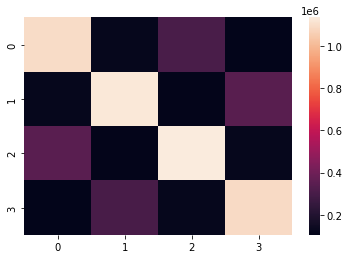

In [32]:
import seaborn as sns
from sklearn.metrics import classification_report
ax = sns.heatmap(pair_counts)